In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


In [34]:
df = pd.read_csv("data.csv")
df.head()


,text,label
0,the boy is stealing cookies while the mother w...,control
1,the mother is washing dishes and the water is ...,control
2,uh the boy is uh taking cookies and the water ...,alzheimer
3,the boy is taking cookies the uh mother is was...,alzheimer


In [35]:
df["word_count"] = df["text"].apply(lambda x: len(x.split()))


In [36]:
def vocabulary_diversity(text):
    words = text.split()
    return len(set(words)) / len(words)

df["vocab_diversity"] = df["text"].apply(vocabulary_diversity)


In [37]:
def repetition_score(text):
    words = text.split()
    most_common = Counter(words).most_common(1)[0][1]
    return most_common / len(words)

df["repetition"] = df["text"].apply(repetition_score)


In [38]:
df.groupby("label")[["word_count", "vocab_diversity", "repetition"]].mean()


,word_count,vocab_diversity,repetition
label,,,
alzheimer,12.0,0.755245,0.206294
control,10.0,0.850000,0.200000


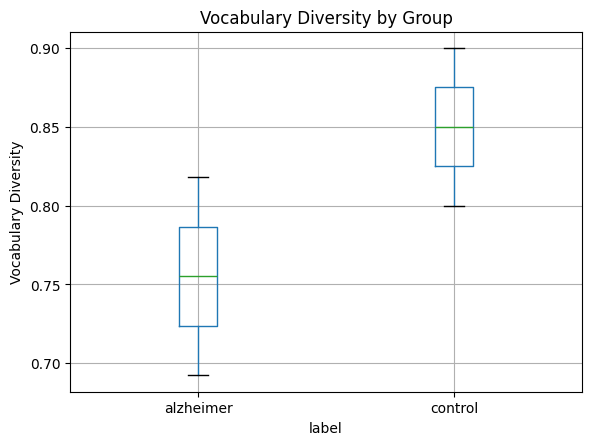

In [39]:
df.boxplot(column="vocab_diversity", by="label")
plt.title("Vocabulary Diversity by Group")
plt.suptitle("")
plt.ylabel("Vocabulary Diversity")
plt.show()
